In [1]:
!pip install tf-keras-vis

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 52.5/52.5 kB 1.1 MB/s eta 0:00:00


In [2]:
%reload_ext autoreload
%autoreload 2

import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline

import tensorflow as tf
from tf_keras_vis.utils import num_of_gpus

_, gpus = num_of_gpus()
print('Tensorflow recognized {} GPUs'.format(gpus))

Tensorflow recognized 1 GPUs


In [3]:
from tensorflow.keras.applications.vgg16 import VGG16 as Model

# Load model
model = Model(weights='imagenet', include_top=True)
model.summary()

553467096/553467096 [==============================] - 8s 0us/step
Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                            

In [4]:
from tf_keras_vis.activation_maximization import ActivationMaximization
from tf_keras_vis.activation_maximization.input_modifiers import Jitter, Rotate2D, Scale
from tf_keras_vis.activation_maximization.regularizers import Norm, TotalVariation2D
from tf_keras_vis.activation_maximization.callbacks import Progress, PrintLogger
from tf_keras_vis.utils.model_modifiers import ExtractIntermediateLayer, ReplaceToLinear
from tf_keras_vis.utils.scores import CategoricalScore

def visualize_layer(model, layer_name, scores):
  def model_modifier_function(current_model):
    target_layer = current_model.get_layer(name=layer_name)
    target_layer.activation = tf.keras.activations.linear
    new_model = tf.keras.Model(inputs=current_model.inputs,
                               outputs=target_layer.output)
    return new_model

  activation_maximization = ActivationMaximization(
      model,
      model_modifier=model_modifier_function,
      clone=True,
  )

  seed_input = tf.random.uniform((len(scores.indices), 224, 224, 3), 0, 255)

  # Generate maximized activation
  activations = activation_maximization(
      scores,
      seed_input=seed_input,
      callbacks=[Progress()],
  )

  return activations

In [5]:
def get_oshape(model, layer):
  return model.get_layer(layer).output_shape[-1]

In [6]:
%%time
layer_name = 'block1_conv1'
activations_b1c1 = visualize_layer(model, layer_name, CategoricalScore([i for i in range(get_oshape(model, layer_name))]))

200/200 [==============================] - 293s 1s/step - Score: 5.0530 - TotalVariation2D: 4.2493 - Norm: 38.0222
CPU times: user 3min 30s, sys: 24.1 s, total: 3min 54s
Wall time: 4min 59s


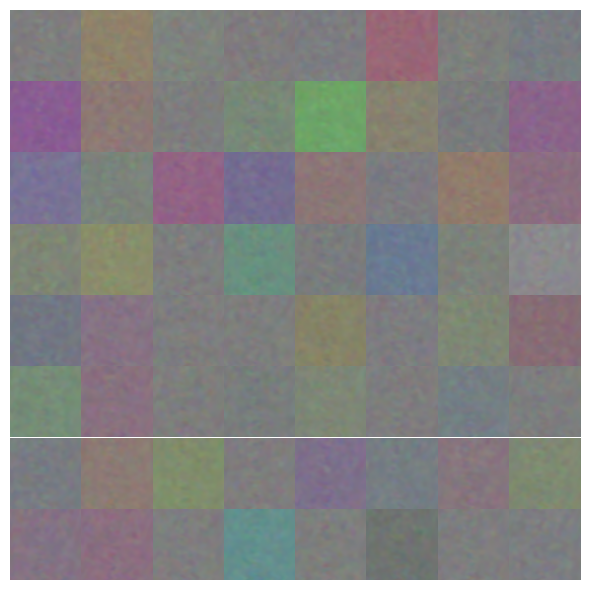

In [7]:
# Render
f, ax = plt.subplots(nrows=8, ncols=8, figsize=(6, 6))
# for i in range(o_size):
for i in range(8):
  for j in range(8):
    ax[i, j].imshow(activations_b1c1[i*8+j].numpy().astype('uint8'))
    # ax[i].set_title(title, fontsize=16)
    ax[i, j].axis('off')

plt.tight_layout()
plt.subplots_adjust(wspace=0, hspace=0)
plt.show()

In [8]:
%%time
layer_name = 'block1_conv2'
activations_b1c2 = visualize_layer(model, layer_name, CategoricalScore([i for i in range(get_oshape(model, layer_name))]))

200/200 [==============================] - 334s 2s/step - Score: 354.9456 - TotalVariation2D: 4.4589 - Norm: 38.5651
CPU times: user 4min 58s, sys: 21.7 s, total: 5min 19s
Wall time: 5min 36s


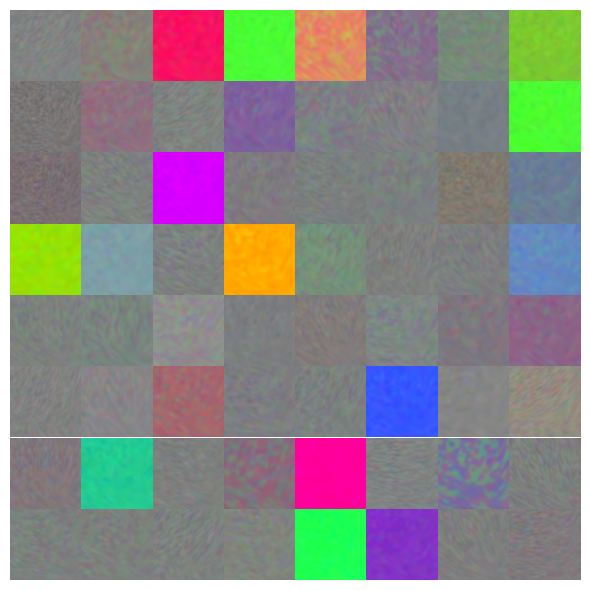

In [9]:
# Render
f, ax = plt.subplots(nrows=8, ncols=8, figsize=(6, 6))
# for i in range(o_size):
for i in range(8):
  for j in range(8):
    ax[i, j].imshow(activations_b1c2[i*8+j].numpy().astype('uint8'))
    # ax[i].set_title(title, fontsize=16)
    ax[i, j].axis('off')

plt.tight_layout()
plt.subplots_adjust(wspace=0, hspace=0)
plt.show()

In [10]:
%%time
layer_name = 'block2_conv1'
activations_b2c1 = visualize_layer(model, layer_name, CategoricalScore([i for i in range(0, get_oshape(model, layer_name), 8)]))

200/200 [==============================] - 69s 320ms/step - Score: 248.9146 - TotalVariation2D: 6.2746 - Norm: 38.6129
CPU times: user 1min 5s, sys: 1.22 s, total: 1min 6s
Wall time: 1min 10s


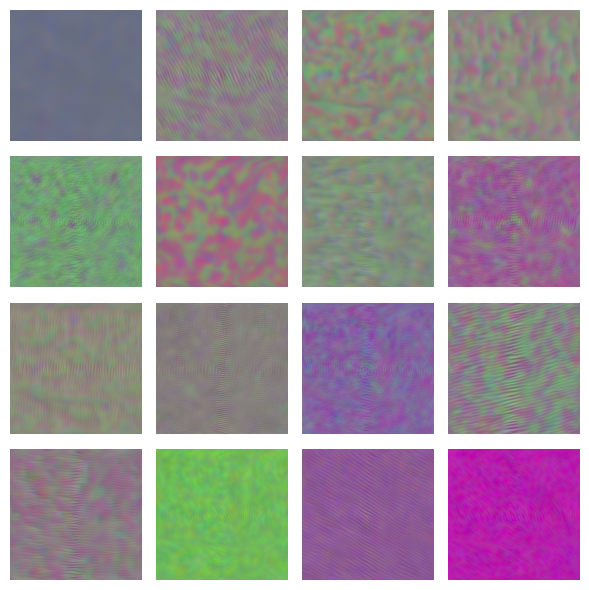

In [11]:
# Render
f, ax = plt.subplots(nrows=4, ncols=4, figsize=(6, 6))
# for i in range(o_size):
for i in range(4):
  for j in range(4):
    ax[i, j].imshow(activations_b2c1[i*4+j].numpy().astype('uint8'))
    # ax[i].set_title(title, fontsize=16)
    ax[i, j].axis('off')

plt.tight_layout()
# plt.subplots_adjust(wspace=0, hspace=0)
plt.show()

In [12]:
%%time
layer_name = 'block2_conv2'
activations_b2c2 = visualize_layer(model, layer_name, CategoricalScore([i for i in range(0, get_oshape(model, layer_name), 8)]))

200/200 [==============================] - 72s 352ms/step - Score: 462.0217 - TotalVariation2D: 8.6852 - Norm: 38.6747
CPU times: user 1min 7s, sys: 1.33 s, total: 1min 8s
Wall time: 1min 13s


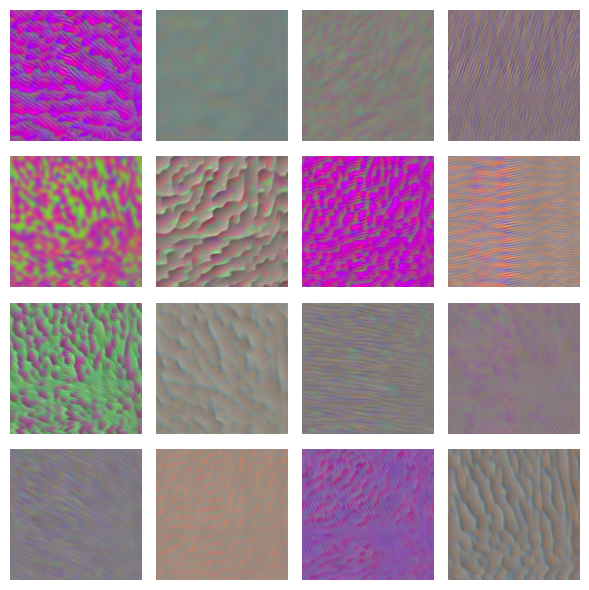

In [13]:
# Render
f, ax = plt.subplots(nrows=4, ncols=4, figsize=(6, 6))
# for i in range(o_size):
for i in range(4):
  for j in range(4):
    ax[i, j].imshow(activations_b2c2[i*4+j].numpy().astype('uint8'))
    # ax[i].set_title(title, fontsize=16)
    ax[i, j].axis('off')

plt.tight_layout()
# plt.subplots_adjust(wspace=0, hspace=0)
plt.show()

In [14]:
%%time
layer_name = 'block3_conv1'
activations_b3c1 = visualize_layer(model, layer_name, CategoricalScore([i for i in range(0, get_oshape(model, layer_name), 16)]))

200/200 [==============================] - 74s 367ms/step - Score: 2977.8403 - TotalVariation2D: 22.5974 - Norm: 39.5443
CPU times: user 1min 8s, sys: 1.43 s, total: 1min 10s
Wall time: 1min 15s


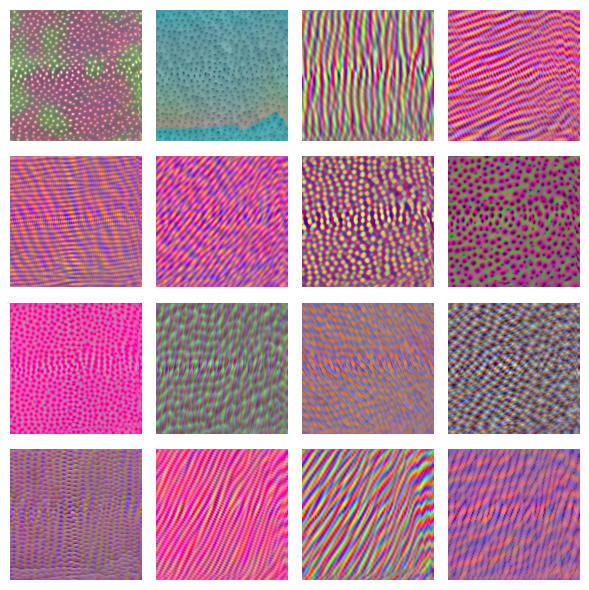

In [15]:
# Render
f, ax = plt.subplots(nrows=4, ncols=4, figsize=(6, 6))
# for i in range(o_size):
for i in range(4):
  for j in range(4):
    ax[i, j].imshow(activations_b3c1[i*4+j].numpy().astype('uint8'))
    # ax[i].set_title(title, fontsize=16)
    ax[i, j].axis('off')

plt.tight_layout()
# plt.subplots_adjust(wspace=0, hspace=0)
plt.show()

In [16]:
%%time
layer_name = 'block3_conv3'
activations_b3c3 = visualize_layer(model, layer_name, CategoricalScore([i for i in range(0, get_oshape(model, layer_name), 16)]))

200/200 [==============================] - 82s 403ms/step - Score: 5075.8887 - TotalVariation2D: 23.8254 - Norm: 40.2775
CPU times: user 1min 14s, sys: 1.77 s, total: 1min 16s
Wall time: 1min 24s


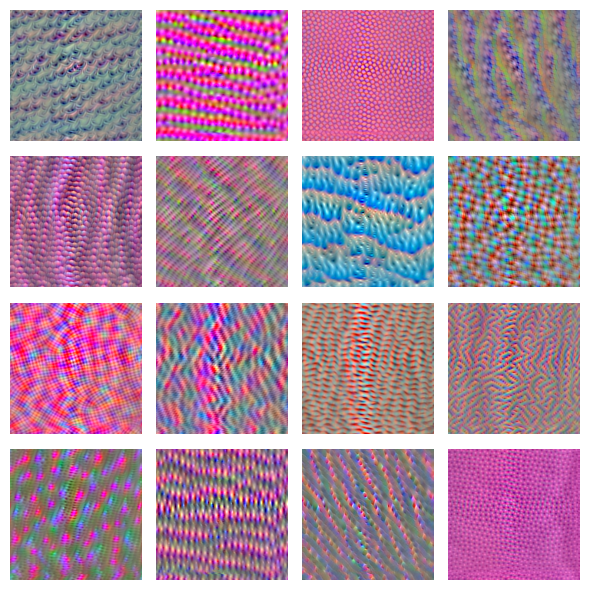

In [17]:
# Render
f, ax = plt.subplots(nrows=4, ncols=4, figsize=(6, 6))
# for i in range(o_size):
for i in range(4):
  for j in range(4):
    ax[i, j].imshow(activations_b3c3[i*4+j].numpy().astype('uint8'))
    # ax[i].set_title(title, fontsize=16)
    ax[i, j].axis('off')

plt.tight_layout()
# plt.subplots_adjust(wspace=0, hspace=0)
plt.show()

In [18]:
%%time
layer_name = 'block4_conv3'
activations_b4c3 = visualize_layer(model, layer_name, CategoricalScore([i for i in range(0, get_oshape(model, layer_name), 32)]))

200/200 [==============================] - 93s 452ms/step - Score: 2047.3218 - TotalVariation2D: 17.8480 - Norm: 39.9029
CPU times: user 1min 22s, sys: 1.75 s, total: 1min 24s
Wall time: 1min 34s


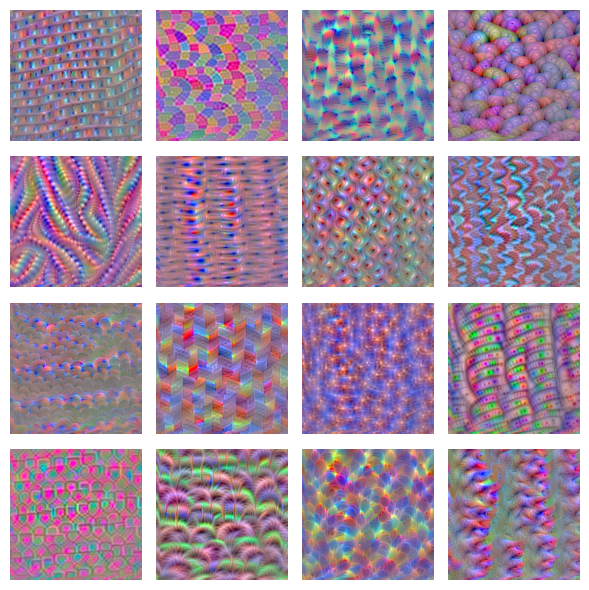

In [19]:
# Render
f, ax = plt.subplots(nrows=4, ncols=4, figsize=(6, 6))
# for i in range(o_size):
for i in range(4):
  for j in range(4):
    ax[i, j].imshow(activations_b4c3[i*4+j].numpy().astype('uint8'))
    # ax[i].set_title(title, fontsize=16)
    ax[i, j].axis('off')

plt.tight_layout()
# plt.subplots_adjust(wspace=0, hspace=0)
plt.show()

In [20]:
%%time
layer_name = 'block5_conv3'
activations_b5c3 = visualize_layer(model, layer_name, CategoricalScore([i for i in range(0, get_oshape(model, layer_name), 32)]))

200/200 [==============================] - 95s 473ms/step - Score: 421.6574 - TotalVariation2D: 10.0732 - Norm: 38.4678
CPU times: user 1min 23s, sys: 1.71 s, total: 1min 25s
Wall time: 1min 36s


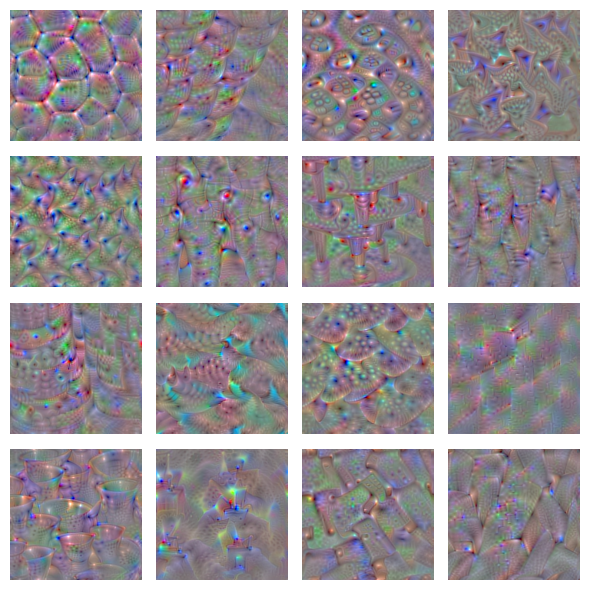

In [21]:
# Render
f, ax = plt.subplots(nrows=4, ncols=4, figsize=(6, 6))
# for i in range(o_size):
for i in range(4):
  for j in range(4):
    ax[i, j].imshow(activations_b5c3[i*4+j].numpy().astype('uint8'))
    # ax[i].set_title(title, fontsize=16)
    ax[i, j].axis('off')

plt.tight_layout()
# plt.subplots_adjust(wspace=0, hspace=0)
plt.show()